In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('attachment_default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [12]:
df.shape  # 1000 rows, 4 columns

(10000, 4)

In [13]:
df.describe() #summary stat

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [14]:
df.info()   #data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


### univariate analysis

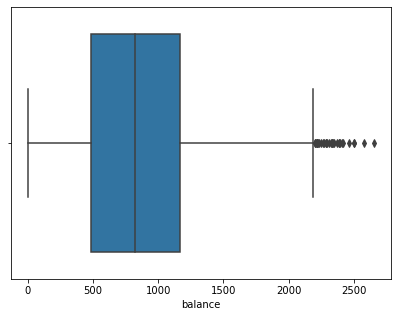

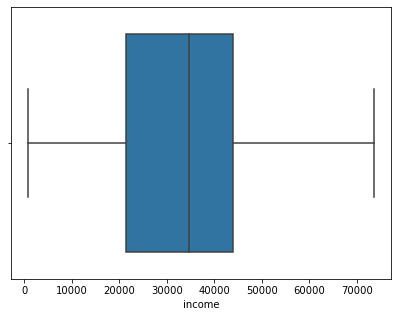

In [17]:
# checking 5 number summary

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['balance'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(df['income'])

plt.show()

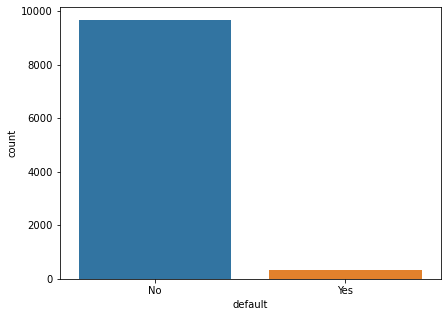

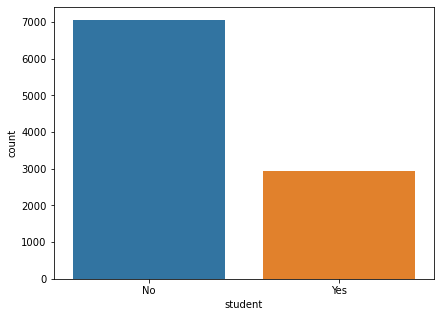

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['default'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(df['student'])

plt.show()

In [19]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [20]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [21]:
df['default'].value_counts(normalize=True)  #ratio

No     0.9667
Yes    0.0333
Name: default, dtype: float64

In [22]:
df['student'].value_counts(normalize=True) #ratio

No     0.7056
Yes    0.2944
Name: student, dtype: float64

### bivariate analysis

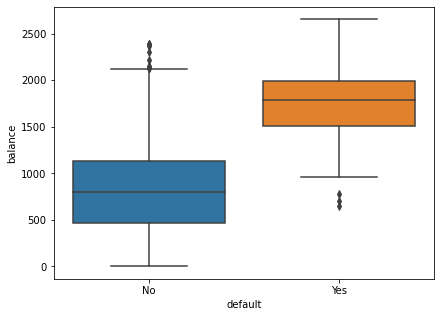

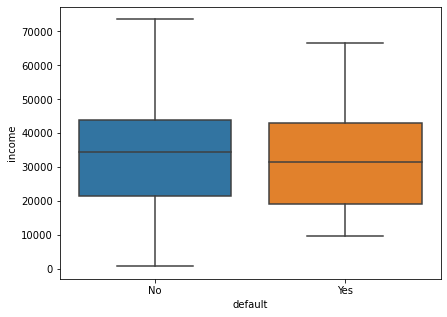

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['default'],df['balance'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(df['default'],df['income'])

plt.show()

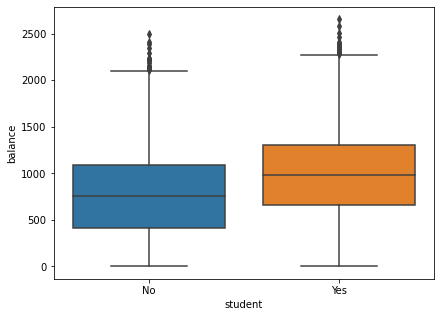

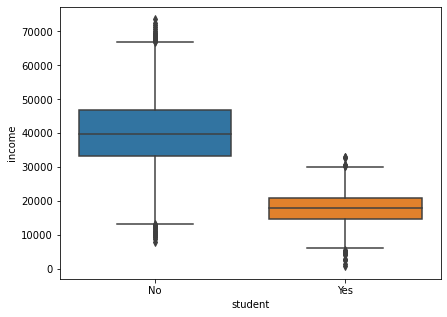

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['student'],df['balance'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(df['student'],df['income'])

plt.show()

In [25]:
pd.crosstab(df['default'],df['student'],normalize='index').round(2) # cat vs cat

student,No,Yes
default,,
No,0.71,0.29
Yes,0.62,0.38


<AxesSubplot:>

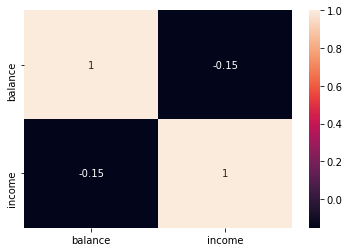

In [26]:
sns.heatmap(df[['balance','income']].corr(), annot=True) # num vs num

In [27]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [28]:
# removing outliers in balance column

In [29]:
Q1 , Q3 = df['balance'].quantile([0.25,0.75])

In [30]:
IQR = Q3 -Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [31]:
LL

-545.134817077462

In [32]:
UL

2193.1743086078177

In [33]:
# imputing outlier region with UL and rest of the va;ues as it is remains.

df['balance'] = np.where(df['balance']> UL , UL , df['balance'])

<AxesSubplot:xlabel='balance'>

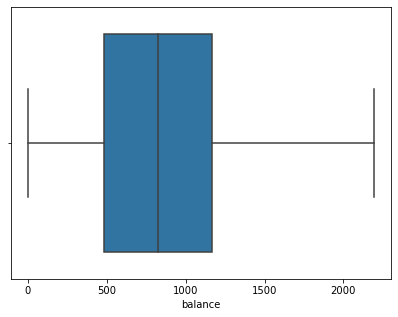

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['balance'])

In [35]:
# label encding of actegoriacal variable
df = pd.get_dummies(df,drop_first=True)

In [36]:
df.head()                 #def_yes = 1 =yes    # stud_yes=1 =yes

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [37]:
df.columns= ['balance','income','default','student']   # renaming the column

In [38]:
df.head()

,balance,income,default,student
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


## Logistic Regression

In [39]:
# Tips : split--> train-fit--> predict--> check error/accuracy/confusion matrix

In [40]:
#  dependent var = default
# independent var  = balance, income, student

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = df.drop('default', axis=1)  # independent variable # dropping default column 
y = df['default']  # dependent variable

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 21, stratify= y)  
# stratify = yes...proportion of sampling is equal...equal in both train and test set...done for imbalanced data

In [44]:
x_train.shape

(7000, 3)

In [45]:
x_test.shape

(3000, 3)

In [51]:
y_train.value_counts(normalize=True).round(2) #startified = yes..properly balanced

0    0.97
1    0.03
Name: default, dtype: float64

In [52]:
y_test.value_counts(normalize=True).round(2) #startified = yes..properly balanced

0    0.97
1    0.03
Name: default, dtype: float64

In [53]:
from imblearn.over_sampling import SMOTE
#SMOTE --> Synthetic minority over sampling technique..
# After balancing the data between two sets equally ... 
# Now  within each set we can add dummy values to increase lower proportion values

In [57]:
sm = SMOTE(random_state = 33, sampling_strategy = 0.75)  

# samplimg strategy here 3:4 -- 
# larger that is 4x part is balanced  for lesser proportioned data  (3% data is increased up )
# smaller that is 3x part is balanced for higher proportioned data (97% data is decreased down )

# Here the training data is oversampled using smote

In [56]:
x_res,y_res = sm.fit_resample(x_train,y_train)

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [66]:
lr.fit(x_res,y_res)

LogisticRegression()

In [70]:
y_pred  = lr.predict(x_test)
y_pred           # predicted values

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [72]:
y_test          # actual values

1071    0
9106    0
501     0
6475    0
5943    0
       ..
6262    0
4315    0
3947    0
6787    0
8815    0
Name: default, Length: 3000, dtype: uint8

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
confusion_matrix(y_test,y_pred)  

# left diagonal --> correctly classified values
# right diagonal --> incorrect classified values

array([[2589,  311],
       [  25,   75]], dtype=int64)

In [76]:
model_accuracy = (2589+75)/(2589+75+311+25)
model_accuracy

0.888